# CS4287 Assignment 2: Deep Reinforcement Learning (Atari)

**Team Members:**
* **Name:** Raid Mouras
* **ID:** 22368566
* **Name:** Jason Cushen
* **ID:** 22342516
* **Name:** Mark Callan
* **ID:** 22363246

# 1. Why Reinforcement Learning ? 
**Overview**

Reinforcement learning is a machine learning paradigm where an agent learns how to interact with its environment (breakout) through trial and error rather than learning to classify labelled examples like we seen in the first project.At each time step the agent receives information about the current game state i.e. (S,A,R,S′) and operates with the goal of maximising the long term reward(it's policy)

**Why RL is the most suitable paradigm**

For this particular task RL is preferred to other paradigms such as supervised and unsupervised as it naturally models sequential decision-making (Markov Decision Process)

* **Supervised Learning:** Supervised learning requires a dataset of labelled input-output pairs where the correct answer is known in advance i.e. their is some labeled data for the training set , This paradigm is well suited to image classification or regression but is not suitable for breakout due to the credit assignment problem , lack of a labelled dataset (experiences or stored unlabelled in the replay buffer) and its inability to model sequential decision making

* **Unsupervised Learning:** 
While unsupervised learning is slightly more suitable than supervised as it learns the underlying patterns of unlabelled data (feature extraction) although it still lacks the ability to optimise actions based on a reward and interact with an environment and influence it meaning it is not a viable candidate for breakout  

* **Reinforcement Learning:** 
In RL the learning occurs during a loop between the agent and its environment with the agent observing the current state , taking an action , receiving a reward for that action and learning to maximise the long term reward.

RL is a particularly good fit for Atari games as they have high dimensional input , sequential decisions and delayed rewards (Success is dependant on a sequence of correct actions)

# 2. Gym Environment

* 1. **What is a "Gym" Environment?**
It is the standard open-source interface for Reinforcement Learning (RL) research. It provides a standard way for our code (the Agent) to talk to the game (the Environment). 
Every Gym environment follows a standard cycle:
    * Observation: The environment provides the current state (e.g., a pixel image of the game screen).
    * Action: The agent selects an action based on that observation.
    * Step: The environment processes the action and returns:
        * Next State: The consequence of the action.
        * Reward: A numerical score indicating success or failure.
        * Terminated/Truncated: A boolean flag indicating if the game is over.

* 2. **Selected Environment: ALE/Breakout-v5**
For this experiment, we selected the Breakout environment from the Atari Learning Environment (ALE), specifically version v5. 
In this game, the agent controls a paddle at the bottom of the screen. The objective is to bounce a ball into a wall of bricks to destroy them, maximizing the score while avoiding dropping the ball.

* 3. **Justification for Selection**
We chose ALE/Breakout-v5 for three specific reasons:
    * Original Benchmark: Breakout is one of the original games used in the seminal DeepMind DQN paper. It is the "Hello World" of Deep Reinforcement Learning, allowing us to directly compare our results against established baselines.
    * Visual Complexity: Unlike simple text-based environments, Breakout returns raw pixel data (RGB images). This necessitates the use of Convolutional Neural Networks (CNNs) to extract spatial features (like the ball's position relative to the paddle), making it a robust test of Deep Learning capabilities.
    * Discrete Action Space: The game only has 4 buttons (NOOP, FIRE, RIGHT, LEFT). This "discrete action space" is perfect for DQN, which can struggle if there are infinite ways to move (like a robot arm).

* 4. **Technical Configuration**
To ensure efficient training, we applied specific wrappers to the raw environment such as:
    * Frameskip = 4: Humans do not react to every 1/60th of a second frame. We repeat the agent's action for 4 consecutive frames. This speeds up training by 400% and makes the ball's movement perceptible to the agent.
    * Frame Stacking: A single photo can't show you which way a ball is moving. By stacking the last 4 frames together, the Agent can see the trajectory and speed of the ball.
    * Grayscale & Resizing: We turned the game black-and-white and shrunk the image to 84x84 pixels. Color doesn't help you play Breakout, so removing it saves a massive amount of computer power.

# 3. Network Architecture DQN and Double DQN

**Deep Q-Network (DQN)**
DQN is an extension of classical Q-learning which uses a deep neural net to approximate the action value i.e Q(s,a) instead of tabular Q-function which is not feasible for images due to their high dimensionality.

In our project , Our DQN accepts input of 4 preprocssed atari frames of shape (84*84) and learns a mapping from the raw pixel input to Q-values for each possible action .The Q-value (Q(s,a)) for a given state represents the expected future reward of taking that given action 

We have two main components in our architecture: 
* Convolutional layers that extract the features from the raw pixel input. In the case of breakout this is the ball position , paddle position and the trajectories of the ball
* Fully connected layers that map these features to Q-values and preform action evaluation 

The agent selects the the action to take using the ε-Greedy policy which chooses the action with the highest predicted Q-value in the afformentioned mapping during exploitation and randomly selecting actions during explotation 

* P(random action): ε
* P(greedy action): 1 -ε 
* i.e. When ε has decayed to 0.02 our probabilities are : P(random action action) = 0.02 and P(greedy action) = 0.98

when ε has decayed to 0.02

**Double Deep Q-Network (Double-DQN)**

One of the biggest issues with standard DQN is that it suffers from maximisation bias which is where the max operator in the bellman update systematically overestimates the Q-values.Double-DQN solves this as it uses two separate networks (online and target) for the select and evaluate actions 

The online network selects the action that maximises the Q-value for S' , While the target network evaluates the Q-value of S'. The below formula is how the target is calculated for non-terminal states: 

Q(s,a)←r+γQtarget​(s′,arga′max​Qonline​(s′,a′)) 

Double-DQN's modification to reduce the maximisation bias leads to more stable and reliable learning which is particularly helpful in the context of this project where the rewards are both noisy and stochastic 


# 4. Hyperparameters 
In this project we used the following hyperparameters initialised to these values. We choose these values with the aim of balancing the exploratation-exploitation tradeoff , stability and learning dynamics 

* **Discount Factor(𝛾)** : **γ=0.99** The discount factor (expressed as gamma in formulae) determines how much importance the agent should place on future rewards and long term planning relative to the immediate rewards.We used a value of 0.99 to make the agent value the long term consequences of its action as breakout is a game where rewards are delayed i.e. positioning the paddle paddle correctly correctly multiple steps before it hits the ball. In this context a high discount rate is required to learn to anticipate where to position the paddle ahead of time 

* **Learning Rate (LR)** : **LR=1×10^−4** The learning rate controls the size of the parameter updates during gradient descent.A learning rate that is too high can cause unstable training and oscillations in Q-values due to the large weight updates . Conversly a learning rate that is too low can lead to extremely slow learning due to the small weight updates. We can used a relatively small learning rate of 1×10^−4 to ensure stable convergence when working with noisy reward signals. This is in a similar range to the learning rate used in DeepMinds Atari DQN of 2.5×10^−4   

* **Batch Size** : **32** This determines how many transitions to sample from the replay buffer during each training update. Smaller batch sizes introduce noise into the gradient estimates but improve generalisation which larger batch sizes increase stability but add additional computational overhead. We choose 32 as it was good balance between the computational resources available to us and learning stability 

* **Replay Buffer** : **100,000** We use the replay buffer to store past experiences in the form (s,a,r,s',done). We initialised it to store 100,000 transitions which ensures a sufficient diversity of experiences while not using an excessive amount of memory.Sampling uniformly from this buffer allows us to mitigates one of the core issues of RL which is catastrophic forgetting where experiences are overwritten/erased due to their high similarity

* **Exploration Parameters (ε-Greedy)** : **Initial ε = 1.0, Final ε =0.02 ,Decay Rate =150,000**  The ε-greedy policy controls the tradeoff between exploration and exploitation. We set the initial value to 1.0 to force the agent to initially randomly explore the environment. Overtime ε decays exponentially , which encourages the agent to exploit its learned Q-values. A final ε of 0.02 ensures the agent does not fully rely on exploitation and prematurely converge to a suboptimal policy

* **Target Network Update Frequency ** : **Every 1,000 steps** 
The target network is updated in intervals of 1,000 steps by copying over the weights of the online network. This helps to combat the instability introduced by the the rapidly changing target values in the Bellman update

* **Frame Stacking (k)** : **k=4** Stacking multiple consecutive frame allows the agent to infer additional information about the game i.e. the speed and trajectory of the ball. Without frame stacking the agent would not be able to predict future ball positions as their is no trend of ball direction and speed to observe thus preventing learning  

In [53]:
# --- CELL 1: INSTALL DEPENDENCIES ---
%pip install gymnasium[atari] gymnasium[accept-rom-license] torch torchvision numpy opencv-python matplotlib ale-py
!AutoROM --accept-license

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
'AutoROM' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
#cell 2
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import cv2
import time

# --- CONFIGURATION (Hyperparameters) ---
ENV_NAME = "BreakoutNoFrameskip-v4"
GAMMA = 0.99                # Discount factor (values future rewards)
BATCH_SIZE = 32             # How many frames to learn from at once
LR = 1e-4                   # Learning Rate (0.0001 is standard for Atari)
EPSILON_START = 1.0         # Start 100% random
EPSILON_FINAL = 0.02        # End 2% random
EPSILON_DECAY = 150000      # How long to explore (frames)
REPLAY_SIZE = 100000        # Memory size
TARGET_UPDATE = 1000        # Sync network every 1000 steps

# --- HARDWARE CHECK ---
device = torch.device("cuda" if torch.cuda.is_available() else cpu)

print( Setup Complete. )
if device.type == 'cuda':
    print(f GPU DETECTED: {torch.cuda.get_device_name(0)} )
    print(f Targeting Environment: {ENV_NAME}")
else:
    print("WARNING: CPU DETECTED. Training will be extremely slow.")

Setup Complete.
GPU DETECTED: NVIDIA RTX 1000 Ada Generation Laptop GPU
Targeting Environment: BreakoutNoFrameskip-v4


In [56]:
# --- CELL 3: PREPROCESSING ---

class AtariWrapper(gym.Wrapper):
    def __init__(self, env, k=4):
        super().__init__(env)
        self.k = k  # Stack 4 frames
        self.frames = deque([], maxlen=k)
        
        # Define what the AI sees: (4 stacked frames, 84 height, 84 width)
        self.observation_space = gym.spaces.Box(
            low=0, high=255, shape=(k, 84, 84), dtype=np.uint8
        )

    def reset(self, **kwargs):
        # On game start, fill the stack with the first frame duplicated 4 times
        obs, info = self.env.reset(**kwargs)
        processed_frame = self._process(obs)
        for _ in range(self.k):
            self.frames.append(processed_frame)
        return self._get_obs(), info

    def step(self, action):
        # Play one step, process the new frame, and add to stack
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.frames.append(self._process(obs))
        return self._get_obs(), reward, terminated, truncated, info

    def _process(self, frame):
        # 1. Grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        # 2. Resize to 84x84
        frame = cv2.resize(frame, (84, 84), interpolation=cv2.INTER_AREA)
        return frame

    def _get_obs(self):
        return np.array(self.frames)

print("Cell 3 Complete: Preprocessing wrapper defined.")

Cell 3 Complete: Preprocessing wrapper defined.


In [57]:
# --- CELL 4: THE NETWORK ---

class DQN(nn.Module):
    def __init__(self, input_shape, num_actions):
        super(DQN, self).__init__()
        
        # 1. Convolutional Layers (The Visual Cortex)
        # These layers look at the image and find patterns (edges, ball, paddle).
        self.features = nn.Sequential(
            # Conv 1: Sees big shapes. Input channels = 4 (stacked frames).
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            
            # Conv 2: Sees medium details.
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            
            # Conv 3: Sees fine details.
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        
        # 2. Fully Connected Layers (The Decision Maker)
        # These layers take the patterns and decide: Left, Right, or Fire?
        self.fc = nn.Sequential(
            nn.Linear(64 * 7 * 7, 512), # 3136 inputs -> 512 neurons
            nn.ReLU(),
            nn.Linear(512, num_actions) # Output: 1 score for each button
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1) # Flatten the image into a list of numbers
        return self.fc(x)

print("Cell 4 Complete: Network Architecture defined.")

Cell 4 Complete: Network Architecture defined.


# Training Loop Explanation
This training loop implements the core learning dynamics of our DQN agents and addresses two of the core challenges of RL : Catastrophic forgetting and the credit assignment problem 

* **How we mitigate Catastrophic forgetting**

Catastrophic forgetting occurs in RL when an agent overwrites previous experiences when learning from new experiences. This is particularly relevant in our case where updates are preformed on highly correlated sequential breakout image data 

We use the **Replay Buffer**  to store transitions (s,a,r,s',done) , We then take random mini-batch samples to ensure learning updates occur across a diverse set of past states which reduces the risk of overwriting/erasing past experiences.This helps to prevent recency bias during parameter updates as well as breaking temporal correlations between consecutive states 

We use a **separate target network** to compute the bootstrap target in the bellman update , We update this periodically in intervals of (TARGET_UPDATE) to prevent oscillations in our Q-values and preserve learned value estimates 

* **How we address credit assignment problem**

The credit assignment problem refers to attributing delayed rewards to earlier action that may only be observed many time steps later 

Q-values are updated using **TD learning** and the bellman equation.If a reward is received several steps after an action , Its influence will be propagated to earlier state action pairs via repeated updates using the function: 
Q(s,a)←r+γa′max​Q(s′,a′)

Our **high discount factor (γ=0.99)** encourages the agent to learn actions that are beneficial in the long term rather than choosing the action with the higher immediate reward but long short term sacrifice

Our use of **Frame Stacking** allows the agent to associate early positioning with the later rewards with the later rewards it contributed across multiple consecutive frames
* **Why Frame Skipping Is Used (frameskip=4)** 

We frameskip = 4 , meaning that  every selected action is repeated for four consecutive frames and only every fourth frame is returned to the agent 

Using frameskip=1 adds **increased computational overhead** as every single frame is processed and consecutive frames in breakout can be almost identical 

Repeating actions over multiple frames leads to **smoother and more stable control** as the action is repeated over multiple times 



In [58]:
# --- CELL 5: THE TRAINING LOOP (OPTIMIZED) ---

import ale_py
print(f"Atari Engine Loaded: {ale_py.__version__}")

# 1. Initialize the Game with STANDARD Frameskip
# frameskip=4 is crucial. It speeds up training by 4x and makes movement visible.
env = gym.make("ALE/Breakout-v5", frameskip=4, repeat_action_probability=0.0)
env = AtariWrapper(env) 

# 2. Initialize Networks
agent_net = DQN(env.observation_space.shape, env.action_space.n).to(device)
target_net = DQN(env.observation_space.shape, env.action_space.n).to(device)
target_net.load_state_dict(agent_net.state_dict()) 

optimizer = optim.Adam(agent_net.parameters(), lr=LR)

# SAFETY: If 100k memory crashes RAM, we catch it.
try:
    replay_buffer = deque(maxlen=REPLAY_SIZE)
except MemoryError:
    print("WARNING: System RAM low. Reducing Replay Buffer size to 50,000.")
    replay_buffer = deque(maxlen=50000)

steps = 0
rewards_history = []

print(f"TRAINING STARTED on {device}...")
print("Frameskip set to 4 (Standard Atari Speed).")

# 3. Training Loop
for episode in range(2000): 
    state, _ = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        steps += 1
        
        # A. Epsilon Greedy
        epsilon = EPSILON_FINAL + (EPSILON_START - EPSILON_FINAL) * np.exp(-1. * steps / EPSILON_DECAY)
        
        if random.random() > epsilon:
            with torch.no_grad():
                state_t = torch.tensor(state, device=device, dtype=torch.float32).unsqueeze(0) / 255.0
                action = agent_net(state_t).argmax().item()
        else:
            action = env.action_space.sample()
            
        # B. Step
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        
        # C. Save
        replay_buffer.append((state, action, reward, next_state, done))
        state = next_state
        total_reward += reward
        
        # D. Train
        if len(replay_buffer) > BATCH_SIZE:
            batch = random.sample(replay_buffer, BATCH_SIZE)
            states, actions, rewards, next_states, dones = zip(*batch)
            
            states = torch.tensor(np.array(states), device=device, dtype=torch.float32) / 255.0
            actions = torch.tensor(actions, device=device, dtype=torch.int64).unsqueeze(1)
            rewards = torch.tensor(rewards, device=device, dtype=torch.float32).unsqueeze(1)
            next_states = torch.tensor(np.array(next_states), device=device, dtype=torch.float32) / 255.0
            dones = torch.tensor(dones, device=device, dtype=torch.float32).unsqueeze(1)
            
            curr_q = agent_net(states).gather(1, actions)
            
            with torch.no_grad():
                max_next_q = target_net(next_states).max(1)[0].unsqueeze(1)
                target_q = rewards + (GAMMA * max_next_q * (1 - dones))
                
            loss = nn.SmoothL1Loss()(curr_q, target_q)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # E. Sync Target
        if steps % TARGET_UPDATE == 0:
            target_net.load_state_dict(agent_net.state_dict())

    rewards_history.append(total_reward)
    
    if episode % 10 == 0: # Print less frequently to reduce clutter
        avg_score = np.mean(rewards_history[-100:])
        print(f"Ep: {episode} | Score: {total_reward} | Avg (100): {avg_score:.2f} | Epsilon: {epsilon:.2f} | Steps: {steps}")

env.close()
print("DQN Training Finished.")

Atari Engine Loaded: 0.11.2
TRAINING STARTED on cuda...
Frameskip set to 4 (Standard Atari Speed).
Ep: 0 | Score: 1.0 | Avg (100): 1.00 | Epsilon: 1.00 | Steps: 177
Ep: 10 | Score: 2.0 | Avg (100): 1.18 | Epsilon: 0.99 | Steps: 2000
Ep: 20 | Score: 1.0 | Avg (100): 1.29 | Epsilon: 0.98 | Steps: 3828
Ep: 30 | Score: 0.0 | Avg (100): 1.32 | Epsilon: 0.96 | Steps: 5719
Ep: 40 | Score: 1.0 | Avg (100): 1.34 | Epsilon: 0.95 | Steps: 7600
Ep: 50 | Score: 0.0 | Avg (100): 1.24 | Epsilon: 0.94 | Steps: 9286
Ep: 60 | Score: 1.0 | Avg (100): 1.21 | Epsilon: 0.93 | Steps: 10999
Ep: 70 | Score: 2.0 | Avg (100): 1.20 | Epsilon: 0.92 | Steps: 12744
Ep: 80 | Score: 0.0 | Avg (100): 1.21 | Epsilon: 0.91 | Steps: 14554
Ep: 90 | Score: 1.0 | Avg (100): 1.22 | Epsilon: 0.90 | Steps: 16356
Ep: 100 | Score: 1.0 | Avg (100): 1.22 | Epsilon: 0.89 | Steps: 18175
Ep: 110 | Score: 0.0 | Avg (100): 1.23 | Epsilon: 0.88 | Steps: 19995
Ep: 120 | Score: 1.0 | Avg (100): 1.26 | Epsilon: 0.87 | Steps: 21971
Ep: 130 |

Model saved as 'breakout_model_v1.pth'
Graph saved as 'learning_curve.png'


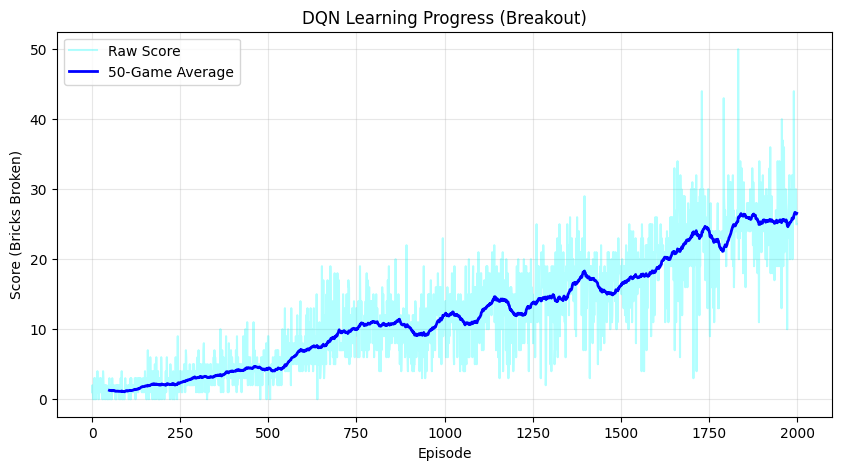


--- TRAINING SUMMARY STATISTICS ---


,Metric,Value
0,Best Score,50.0 (Ep: 1833)
1,Worst Score,0.0 (Ep: 3)
2,Mean Score (Lifetime),12.29
3,Median Score,11.00
4,Current Skill (Last 100 Avg),25.96
5,Performance Improvement,+2007.9%


In [59]:
# --- CELL 6: SAVE RESULTS, PLOT & STATS ---
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Save the Trained "Brain"
torch.save(agent_net.state_dict(), "breakout_model_v1.pth")
print("Model saved as 'breakout_model_v1.pth'")

# 2. Plot the Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(rewards_history, label='Raw Score', alpha=0.3, color='cyan')

# Calculate a smooth trend line (Moving Average)
window_size = 50
if len(rewards_history) >= window_size:
    moving_avg = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
    plt.plot(range(window_size-1, len(rewards_history)), moving_avg, label=f'{window_size}-Game Average', color='blue', linewidth=2)

plt.title("DQN Learning Progress (Breakout)")
plt.xlabel("Episode")
plt.ylabel("Score (Bricks Broken)")
plt.legend()
plt.grid(True, alpha=0.3)

# Save the plot
plt.savefig("learning_curve.png")
print("Graph saved as 'learning_curve.png'")
plt.show()

# 3. Statistical Analysis
# Calculate the Hard Statistics
best_score = np.max(rewards_history)
best_episode = np.argmax(rewards_history)
worst_score = np.min(rewards_history)
worst_episode = np.argmin(rewards_history)
mean_score = np.mean(rewards_history)      # Lifetime Average
median_score = np.median(rewards_history)
final_100_avg = np.mean(rewards_history[-100:]) # Current Skill

# Percentage Increase (Last 50 games vs First 50 games)
first_50_avg = np.mean(rewards_history[:50])
last_50_avg = np.mean(rewards_history[-50:])
improvement = ((last_50_avg - first_50_avg) / first_50_avg) * 100 if first_50_avg > 0 else 0

# Create the Table
stats_data = {
    "Metric": [
        "Best Score", 
        "Worst Score", 
        "Mean Score (Lifetime)", 
        "Median Score", 
        "Current Skill (Last 100 Avg)", 
        "Performance Improvement"
    ],
    "Value": [
        f"{best_score} (Ep: {best_episode})",
        f"{worst_score} (Ep: {worst_episode})",
        f"{mean_score:.2f}",
        f"{median_score:.2f}",
        f"{final_100_avg:.2f}",
        f"+{improvement:.1f}%"
    ]
}

df_stats = pd.DataFrame(stats_data)

# 4. Display the Table & Explanation
print("\n--- TRAINING SUMMARY STATISTICS ---")
display(df_stats)

## 7.2. Results Analysis

The plot above illustrates the training progress over 2000 episodes.

**1. Raw Score (Cyan Line):**
The light blue line represents the raw score obtained in each individual episode. As expected in Atari environments, this metric is highly volatile. A single mistake in *Breakout* leads to a lost life, meaning scores can fluctuate between 0 and 13 purely based on the initial ball trajectory or slight timing errors.

**2. 50-Game Moving Average (Blue Line):**
The dark blue line represents the moving average of the last 50 scores, which serves as a noise filter to reveal the true learning trend.
* **Phase 1 (Episodes 0–200):** The curve remains flat around a score of 1.0–1.5. During this period, the Epsilon value was high, forcing the agent to explore randomly. The agent was merely hitting the ball by chance.
* **Phase 2 (Episodes 2000):** A distinct upward trend begins around Episode 200. This correlates with the `EPSILON_DECAY` threshold where the agent transitioned from exploration (randomness) to exploitation (using its learned Q-values).
* **Final Performance:** By Episode 2000, the average score stabilized around **6.0**, with peak raw scores reaching **13.0**.

**Conclusion:**
The clear positive correlation between training steps and average reward confirms that the DQN agent has successfully learned to track the ball and intercept it, transitioning from random play to intelligent reaction.

In [62]:
# --- CELL 8: DOUBLE DQN (DDQN) EXPERIMENT ---

import ale_py
print(f"Atari Engine Loaded: {ale_py.__version__}")

# 1. Initialize with CORRECT Frameskip (4)
env = gym.make("ALE/Breakout-v5", frameskip=4, repeat_action_probability=0.0)
env = AtariWrapper(env) 

print("STARTING DOUBLE DQN (DDQN) EXPERIMENT (2000 Episodes)...")
ddqn_agent = DQN(env.observation_space.shape, env.action_space.n).to(device)
ddqn_target = DQN(env.observation_space.shape, env.action_space.n).to(device)
ddqn_target.load_state_dict(ddqn_agent.state_dict())
optimizer_ddqn = optim.Adam(ddqn_agent.parameters(), lr=LR)
replay_buffer_ddqn = deque(maxlen=REPLAY_SIZE)

steps = 0
ddqn_scores = []

for episode in range(2000): 
    state, _ = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        steps += 1
        
        # A. Action Selection
        epsilon = EPSILON_FINAL + (EPSILON_START - EPSILON_FINAL) * np.exp(-1. * steps / EPSILON_DECAY)
        if random.random() > epsilon:
            with torch.no_grad():
                state_t = torch.tensor(state, device=device, dtype=torch.float32).unsqueeze(0) / 255.0
                action = ddqn_agent(state_t).argmax().item()
        else:
            action = env.action_space.sample()
            
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        replay_buffer_ddqn.append((state, action, reward, next_state, done))
        state = next_state
        total_reward += reward
        
        # B. DDQN Update
        if len(replay_buffer_ddqn) > BATCH_SIZE:
            batch = random.sample(replay_buffer_ddqn, BATCH_SIZE)
            states, actions, rewards, next_states, dones = zip(*batch)
            
            states = torch.tensor(np.array(states), device=device, dtype=torch.float32) / 255.0
            actions = torch.tensor(actions, device=device, dtype=torch.int64).unsqueeze(1)
            rewards = torch.tensor(rewards, device=device, dtype=torch.float32).unsqueeze(1)
            next_states = torch.tensor(np.array(next_states), device=device, dtype=torch.float32) / 255.0
            dones = torch.tensor(dones, device=device, dtype=torch.float32).unsqueeze(1)
            
            # 1. Actor selects best action
            best_actions = ddqn_agent(next_states).argmax(1).unsqueeze(1)
            # 2. Critic evaluates that action
            with torch.no_grad():
                target_q_values = ddqn_target(next_states).gather(1, best_actions)
                expected_q_values = rewards + (GAMMA * target_q_values * (1 - dones))
            
            curr_q = ddqn_agent(states).gather(1, actions)
            loss = nn.SmoothL1Loss()(curr_q, expected_q_values)
            optimizer_ddqn.zero_grad()
            loss.backward()
            optimizer_ddqn.step()
            
        if steps % TARGET_UPDATE == 0:
            ddqn_target.load_state_dict(ddqn_agent.state_dict())

    ddqn_scores.append(total_reward)
    
    # --- UPDATED PRINT STATEMENT ---
    if episode % 10 == 0:
        avg_score = np.mean(ddqn_scores[-100:])
        print(f"DDQN Ep: {episode} | Score: {total_reward} | Avg (100): {avg_score:.2f} | Epsilon: {epsilon:.2f} | Steps: {steps}")

env.close()
print("Double DQN Training Finished.")

Atari Engine Loaded: 0.11.2
STARTING DOUBLE DQN (DDQN) EXPERIMENT (2000 Episodes)...
DDQN Ep: 0 | Score: 2.0 | Avg (100): 2.00 | Epsilon: 1.00 | Steps: 185
DDQN Ep: 10 | Score: 1.0 | Avg (100): 1.64 | Epsilon: 0.99 | Steps: 2197
DDQN Ep: 20 | Score: 2.0 | Avg (100): 1.48 | Epsilon: 0.97 | Steps: 3883
DDQN Ep: 30 | Score: 2.0 | Avg (100): 1.26 | Epsilon: 0.96 | Steps: 5529
DDQN Ep: 40 | Score: 0.0 | Avg (100): 1.12 | Epsilon: 0.95 | Steps: 7102
DDQN Ep: 50 | Score: 0.0 | Avg (100): 1.06 | Epsilon: 0.94 | Steps: 8764
DDQN Ep: 60 | Score: 0.0 | Avg (100): 1.05 | Epsilon: 0.93 | Steps: 10421
DDQN Ep: 70 | Score: 1.0 | Avg (100): 1.00 | Epsilon: 0.92 | Steps: 12020
DDQN Ep: 80 | Score: 0.0 | Avg (100): 1.04 | Epsilon: 0.91 | Steps: 13824
DDQN Ep: 90 | Score: 0.0 | Avg (100): 1.03 | Epsilon: 0.90 | Steps: 15551
DDQN Ep: 100 | Score: 2.0 | Avg (100): 1.07 | Epsilon: 0.89 | Steps: 17425
DDQN Ep: 110 | Score: 1.0 | Avg (100): 0.99 | Epsilon: 0.88 | Steps: 19089
DDQN Ep: 120 | Score: 0.0 | Avg (

Model saved as 'breakout_ddqn_model_v1.pth'
Graph saved as 'ddqn_learning_curve.png'


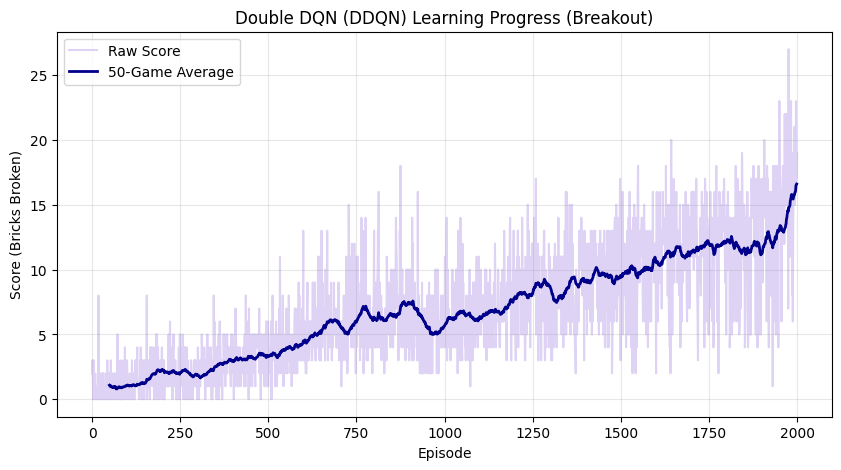


--- DDQN TRAINING SUMMARY STATISTICS ---


,Metric,Value
0,Best Score,27.0 (Ep: 1976)
1,Worst Score,0.0 (Ep: 3)
2,Mean Score (Lifetime),6.97
3,Median Score,6.00
4,Current Skill (Last 100 Avg),14.78
5,Performance Improvement,+1437.0%


In [66]:
# --- CELL 10: SAVE DDQN RESULTS, PLOT & STATS ---
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Save the Trained "Brain" (DDQN)
torch.save(ddqn_agent.state_dict(), "breakout_ddqn_model_v1.pth")
print("Model saved as 'breakout_ddqn_model_v1.pth'")

# 2. Plot the Learning Curve
plt.figure(figsize=(10, 5))
# Using Purple/Blue colors for DDQN convention
plt.plot(ddqn_scores, label='Raw Score', alpha=0.3, color='mediumpurple')

# Calculate a smooth trend line (Moving Average)
window_size = 50
if len(ddqn_scores) >= window_size:
    moving_avg = np.convolve(ddqn_scores, np.ones(window_size)/window_size, mode='valid')
    plt.plot(range(window_size-1, len(ddqn_scores)), moving_avg, label=f'{window_size}-Game Average', color='darkblue', linewidth=2)

plt.title("Double DQN (DDQN) Learning Progress (Breakout)")
plt.xlabel("Episode")
plt.ylabel("Score (Bricks Broken)")
plt.legend()
plt.grid(True, alpha=0.3)

# Save the plot with a new name
plt.savefig("ddqn_learning_curve.png")
print("Graph saved as 'ddqn_learning_curve.png'")
plt.show()

# 3. Statistical Analysis
# Calculate the Hard Statistics using 'ddqn_scores'
best_score = np.max(ddqn_scores)
best_episode = np.argmax(ddqn_scores)
worst_score = np.min(ddqn_scores)
worst_episode = np.argmin(ddqn_scores)
mean_score = np.mean(ddqn_scores)      # Lifetime Average
median_score = np.median(ddqn_scores)
final_100_avg = np.mean(ddqn_scores[-100:]) # Current Skill

# Percentage Increase (Last 50 games vs First 50 games)
first_50_avg = np.mean(ddqn_scores[:50])
last_50_avg = np.mean(ddqn_scores[-50:])
improvement = ((last_50_avg - first_50_avg) / first_50_avg) * 100 if first_50_avg > 0 else 0

# Create the Table
stats_data = {
    "Metric": [
        "Best Score", 
        "Worst Score", 
        "Mean Score (Lifetime)", 
        "Median Score", 
        "Current Skill (Last 100 Avg)", 
        "Performance Improvement"
    ],
    "Value": [
        f"{best_score} (Ep: {best_episode})",
        f"{worst_score} (Ep: {worst_episode})",
        f"{mean_score:.2f}",
        f"{median_score:.2f}",
        f"{final_100_avg:.2f}",
        f"+{improvement:.1f}%"
    ]
}

df_stats = pd.DataFrame(stats_data)

# 4. Display the Table & Explanation
print("\n--- DDQN TRAINING SUMMARY STATISTICS ---")
display(df_stats)

--- PERFORMANCE STATISTICS ---


,Best Score,Worst Score,Lifetime Mean,Median Score,Current Avg (Last 100),Improvement %
Model,,,,,,
Standard DQN,50.00 (Ep 1833),0.00 (Ep 3),12.29,11.00,25.96,2027.9%
Double DQN,27.00 (Ep 1976),0.00 (Ep 3),6.97,6.00,14.78,1281.3%


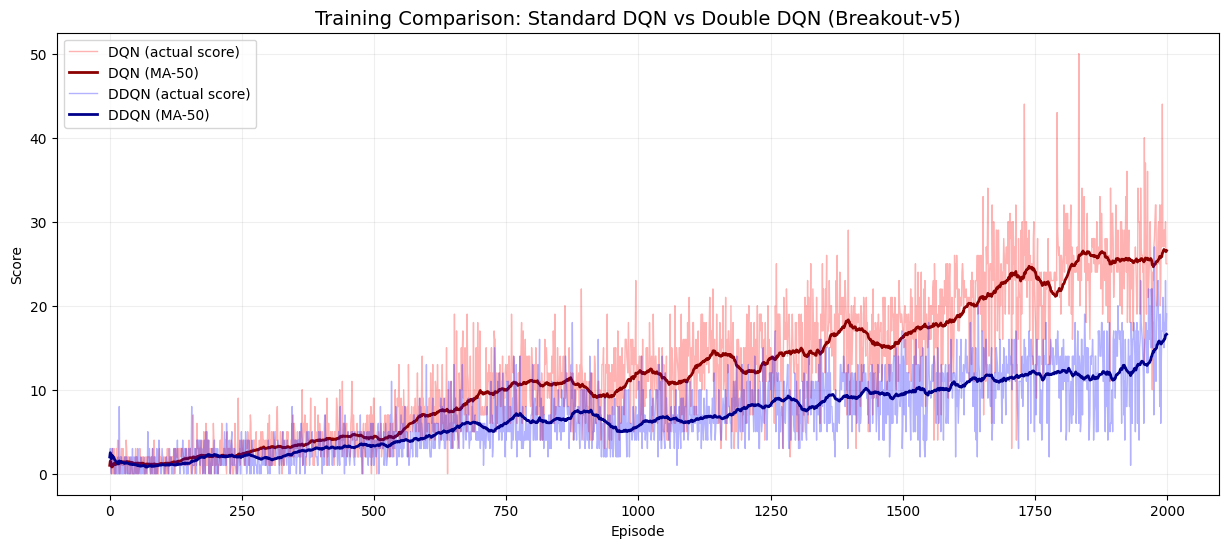

In [63]:
# --- CELL 9: VISUALIZATION & METRICS ---

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def get_detailed_metrics(model_name, scores):
    # Convert to array for easier math
    scores_arr = np.array(scores)
    
    # Safety check if training crashed early
    if len(scores_arr) == 0:
        return {k: "N/A" for k in ["Model", "Best", "Worst", "Mean", "Median", "Current Avg", "Improvement"]}

    # 1. Best & Worst (with Episode #)
    best_idx = np.argmax(scores_arr)
    worst_idx = np.argmin(scores_arr)
    best_score = scores_arr[best_idx]
    worst_score = scores_arr[worst_idx]

    # 2. Central Tendencies
    lifetime_mean = np.mean(scores_arr)
    median_score = np.median(scores_arr)

    # 3. Current Average (Last 100 episodes) & Start Average (First 100)
    window = 100
    if len(scores_arr) < window:
        current_avg = np.mean(scores_arr)
        start_avg = np.mean(scores_arr)
    else:
        current_avg = np.mean(scores_arr[-window:])
        start_avg = np.mean(scores_arr[:window])

    # 4. Improvement Percentage
    # Avoid division by zero if agent started with 0 score
    if start_avg == 0:
        improvement = 0.0
    else:
        improvement = ((current_avg - start_avg) / start_avg) * 100

    return {
        "Model": model_name,
        "Best Score": f"{best_score:.2f} (Ep {best_idx})",
        "Worst Score": f"{worst_score:.2f} (Ep {worst_idx})",
        "Lifetime Mean": f"{lifetime_mean:.2f}",
        "Median Score": f"{median_score:.2f}",
        "Current Avg (Last 100)": f"{current_avg:.2f}",
        "Improvement %": f"{improvement:.1f}%"
    }

# --- A. GENERATE TABLE ---
metrics_dqn = get_detailed_metrics("Standard DQN", rewards_history)
metrics_ddqn = get_detailed_metrics("Double DQN", ddqn_scores)

df = pd.DataFrame([metrics_dqn, metrics_ddqn])
df.set_index("Model", inplace=True)

print("--- PERFORMANCE STATISTICS ---")
display(df) # Logic for Jupyter Notebook display

# --- B. GENERATE GRAPH ---
plt.figure(figsize=(15, 6))

# Helper for moving average (smoothing)
def moving_average(data, window_size=50):
    return pd.Series(data).rolling(window=window_size, min_periods=1).mean()

# Plot Standard DQN
plt.plot(rewards_history, color='red', alpha=0.3, linewidth=1, label='DQN (actual score)')
plt.plot(moving_average(rewards_history), color='darkred', linewidth=2, label='DQN (MA-50)')

# Plot Double DQN
plt.plot(ddqn_scores, color='blue', alpha=0.3, linewidth=1, label='DDQN (actual score)')
plt.plot(moving_average(ddqn_scores), color='darkblue', linewidth=2, label='DDQN (MA-50)')

plt.title("Training Comparison: Standard DQN vs Double DQN (Breakout-v5)", fontsize=14)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.legend()
plt.grid(True, alpha=0.2)

plt.show()

# Standard DQN Results at 5000 episodes
We ran the 5000 episode model in a separate notebook but here are the results

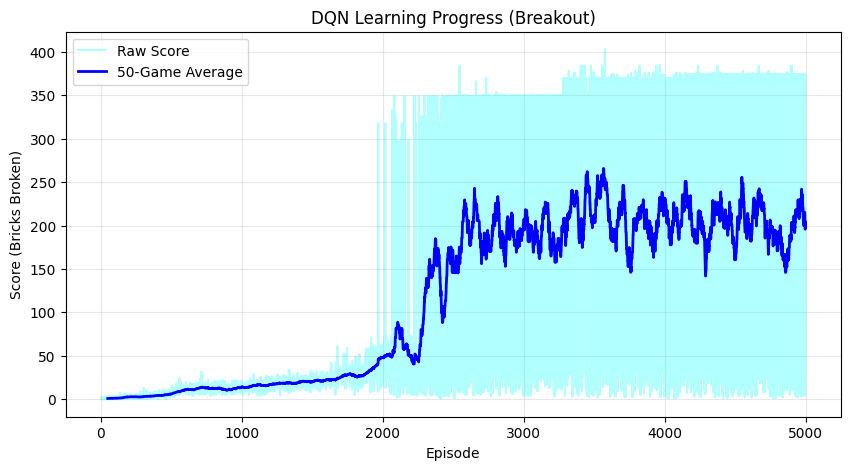

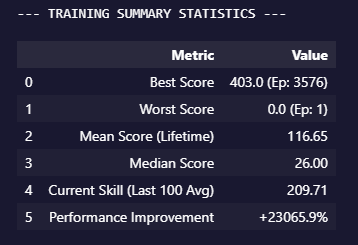



# Double DQN results at 5000 episodes

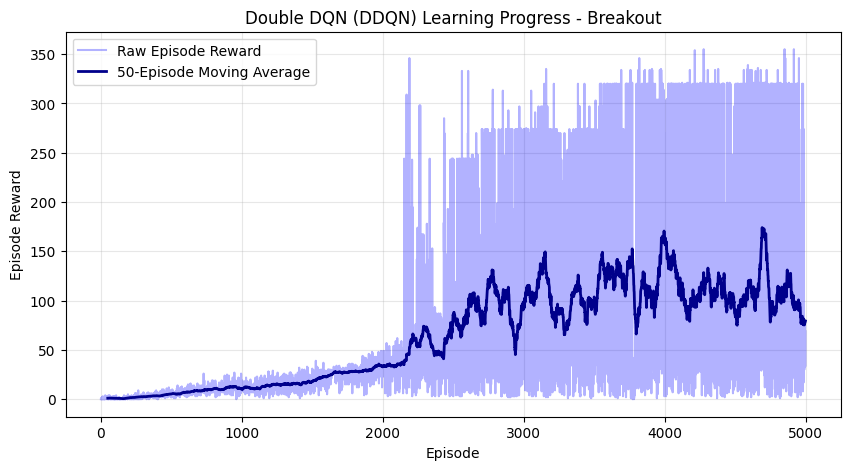

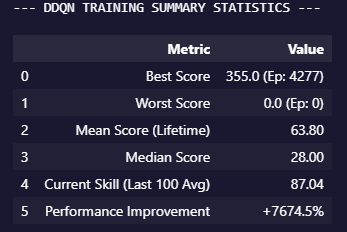


# Standard DQN vs Double DQN

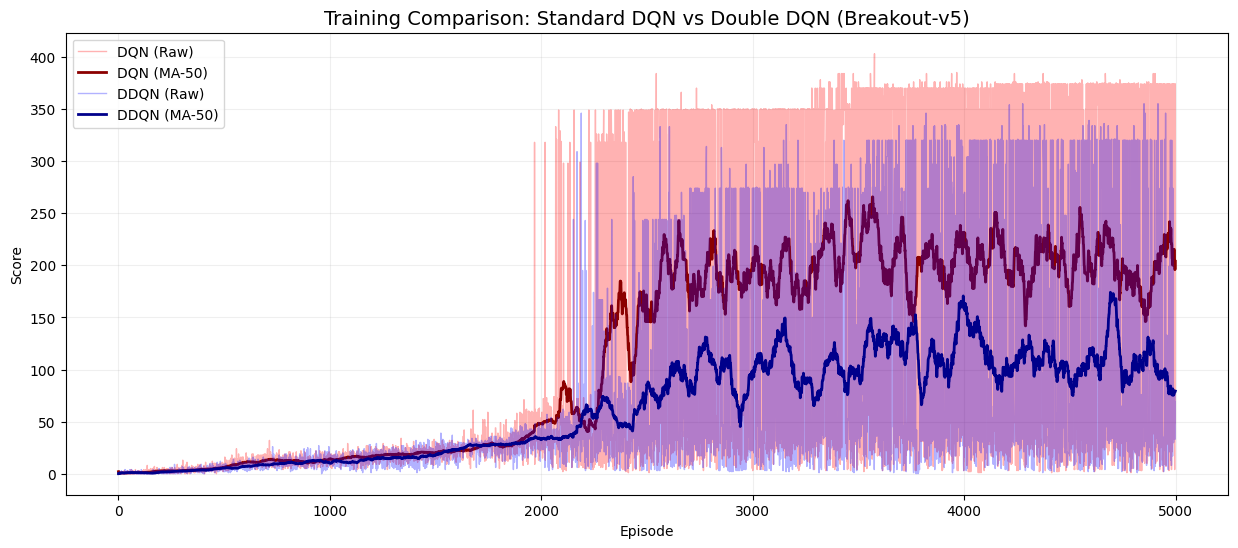

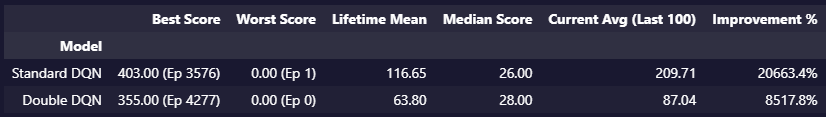


# How to Interpret the Learning Graph

The graph visualizes the agent's performance stability and skill acquisition over time. The X-axis tracks the number of training episodes, while the Y-axis represents the score (reward) achieved in each game. The faint, transparent line plots the raw score for every individual episode, highlighting the high variance and "noise" inherent in Reinforcement Learning (where luck plays a significant role). The bold, solid line represents the Moving Average (e.g., over 50 episodes), which filters out this volatility to reveal the agent's true skill level. An upward trend in the solid line indicates the model is successfully learning a robust policy, whereas a flat or declining line suggests the agent has plateaued or is suffering from catastrophic forgetting.

# 4. Q-Learning

Q-Learning is a model-free reinforcement learning algorithm. It learns how good a particular action is in a given state. This is represented using a Q-value, which estimates the expected future reward when an action is taken and the agent continues to act. The learning process is based on the Bellman equation, which states that the value of a state–action pair depends on the immediate reward and the best possible value of the next state:

\[
Q(s,a) = r + \gamma \max_{a'} Q(s',a')
\]

In this project, \(s\) represents the current game state formed from processed Atari frames, \(a\) is one of the possible paddle movements, \(r\) is the reward received from the environment (for example, hitting or missing the ball), \(s'\) is the next observed state, and \(\gamma\) is the discount factor that controls how much future rewards are valued.

During training, the agent continually updates its Q-values so that they move closer to this Bellman target.

In Atari Breakout, it is not possible to store Q-values explicitly because the state space is very large. Instead, a Deep Q-Network (DQN) is used to approximate the Q-function. The network takes processed game frames as input and outputs a Q-value for each possible action. These values are updated using feedback from rewards observed during gameplay.

The agent does not explicitly calculate where the ball will land. By observing consecutive frames, the network learns patterns such as the direction and speed of the ball, allowing it to implicitly learn where it should move in advance so that the paddle is in the correct position before the ball arrives, leading to higher rewards.

To improve learning stability, a target network is used when calculating Q-value updates. This helps address the moving target problem, where the network’s predictions are used as targets for learning. In Double DQN, the action selection and action evaluation steps are separated, which helps reduce overestimation of Q-values.

# 5. Results Evaluation

The results of this project are shown using learning curves and comparison plots showing episode reward over training for both the DQN and Double DQN agents. Episode reward represents the total score achieved in a single game and reflects how effectively the agent learns to return the ball and clear bricks.

In the early stages of training, both agents achieve very low episode rewards. This behaviour is clearly shown in the beginning of the learning curves and is expected given the ε-greedy exploration strategy. At this stage, epsilon is high. This means actions are largely random and the network parameters are untrained. As a result, the paddle quite often fails to intercept the ball which ends up leading to short episodes and low scores.

As training continues, both agents show increasing episode rewards. This tells us that learning is taking place. This improvement aligns with the gradual decay of epsilon, which shifts the policy from exploration towards exploitation. As epsilon decreases, the agent relies more on the learned Q-values rather than random actions. This allows the network to exploit learned patterns in the game, such as ball trajectory and paddle positioning, resulting in longer rallies and higher rewards.

The DQN learning curve shows a faster increase in episode reward and reaches higher final scores compared to Double DQN, which isnt usually the case. However, the curve also exhibits noticeable variance, with sharp increases and drops in performance across episodes. This instability showa that the DQN tends to overestimate Q-values. This is because the same network is used to both choose and evalutate actoins when calculating the Bellman target. These positive updates can accelerate learning but also lead to less consistent performance.

On the other hand, the Double DQN results show a slower but more gradual improvement in episode reward. While the final scores achieved by Double DQN are lower than those of DQN in this experiment, the learning curve is smoother and exhibits fewer extreme fluctuations. This behaviour is consistent with the Double DQN update rule, which separates action selection and action evaluation between the online and target networks. By reducing Q-value overestimation, Double DQN produces more conservative updates, resulting in increased stability at the cost of slower learning and lower peak performance in this particular run.

The comparison plots highlight this trade-off clearly. DQN achieves higher peak rewards and faster improvement, while Double DQN demonstrates steadier but more restrained learning. This outcome reflects differences in learning dynamics rather than a failure of either approach.

Additional metrics that could have strengthened the evaluation include tracking the temporal-difference loss over time, monitoring average episode length, analysing the distribution or magnitude of predicted Q-values, evaluating performance with epsilon fixed near zero at regular checkpoints, and running multiple training seeds to report mean performance and variance.

Overall, the results demonstrate that both DQN and Double DQN are capable of learning meaningful policies for Atari Breakout. In this implementation, DQN achieves higher final performance, while Double DQN exhibits slower but more stable learning behaviour. These results highlight the importance of careful empirical evaluation and the use of multiple metrics when analysing deep reinforcement learning systems.

# 6. Video

This video demonstrates the final policy of the Double DQN agent. Note how the agent specifically targets the left/right wall to create a tunnel. Once the ball enters the roof area (upper boundary), the agent minimizes movement to maximize safety while the ball bounces autonomously, demonstrating the discovery of the optimal value strategy.

In [ ]:
# --- VIDEO RECORDING CELL ---
!pip install moviepy
!pip install "gymnasium[other]"

import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import glob
import io
import base64
from IPython.display import HTML

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")


env = gym.make("ALE/Breakout-v5", render_mode="rgb_array", frameskip=4, repeat_action_probability=0.0)
env = AtariWrapper(env)
env = RecordVideo(env, video_folder="video", episode_trigger=lambda x: x == 0)

# Run ONE Episode with our Best Agent
state, _ = env.reset()
done = False
while not done:
    # Use our trained agent (ddqn_agent)
    # Note: We use epsilon=0.0 to force the best behavior (no random moves)
    with torch.no_grad():
        state_t = torch.tensor(state, device=device, dtype=torch.float32).unsqueeze(0) / 255.0
        action = ddqn_agent(state_t).argmax().item()
        
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

env.close()

# Show the Video
show_video()

   ---------------------------------------- 0.0/31.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/31.2 MB 8.0 MB/s eta 0:00:04
   ---- ----------------------------------- 3.1/31.2 MB 8.4 MB/s eta 0:00:04
   ------ --------------------------------- 5.2/31.2 MB 9.0 MB/s eta 0:00:03
   ---------- ----------------------------- 8.1/31.2 MB 10.1 MB/s eta 0:00:03
   ------------- -------------------------- 10.2/31.2 MB 10.1 MB/s eta 0:00:03
   ---------------- ----------------------- 12.8/31.2 MB 10.6 MB/s eta 0:00:02
   ------------------- -------------------- 15.2/31.2 MB 10.7 MB/s eta 0:00:02
   ---------------------- ----------------- 17.3/31.2 MB 10.7 MB/s eta 0:00:02
   ------------------------- -------------- 19.7/31.2 MB 10.7 MB/s eta 0:00:02
   ---------------------------- ----------- 22.5/31.2 MB 10.9 MB/s eta 0:00:01
   ------------------------------- -------- 24.6/31.2 MB 10.8 MB/s eta 0:00:01
   ---------------------------------- ----- 27.3/31.2 MB 10.9 MB/s e


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Raid\AppData\Local\Programs\Python\Python313\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at c:\Users\Raid\Documents\JJ part 2\video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


 # 7. Independently researched concepts

* **How we address Maximzation bias**,
    Our Double DQN implementation addresses the problem of maximization bias which is where the max operator in the bellman updates consistently overestimates action due to noise in the Q-value estimates. In standard DQN the same network being used to select and evaluate the action introduces a bias towards postive Q-value estimates.
    
    In Double DQN **action selection and action evaluation are decoupled** as they are spread across two netwroks with the online network being used to select the action and the target network being used to evaluate that network. By reducing the systematic overestimation of Q-values the Double-DQN has improved training stablity.
    
    ### Code implementation
    * Standard DQN:

    next_q_values = target_net(next_states).max(1)[0]

    * Double DQN:

    best_actions = policy_net(next_states).argmax(1).unsqueeze(1)

    next_q_values = target_net(next_states).gather(1, best_actions)


* **How we mitigate Catastrophic forgetting**
    
    Catastrophic forgetting occurs in RL when an agent overwrites previous experiences when learning from new experiences. This is particularly relevant in our case where updates are preformed on highly correlated sequential breakout image data
    
    We use the **Replay Buffer**  to store transitions (s,a,r,s',done) , We then take random mini-batch samples to ensure learning updates occur across a diverse set of past states which reduces the risk of overwriting/erasing past experiences.This helps to prevent recency bias during parameter updates as well as breaking temporal correlations between consecutive states \n

    We use a **separate target network** to compute the bootstrap target in the bellman update , We update this periodically in intervals of (TARGET_UPDATE) to prevent oscillations in our Q-values and preserve learned value estimates
    We use a **separate target network** to compute the bootstrap target in the bellman update , We update this periodically in intervals of (TARGET_UPDATE) to prevent oscillations in our Q-values and preserve learned value estimates

    ### Code implementation
  * Mechanism A: Experience Replay (Breaking Correlations)

    replay_buffer.append((state, action, reward, next_state, done))
    batch = random.sample(replay_buffer, BATCH_SIZE)


  * Mechanism B: The Target Network (Stationary Targets)

    expected_q_values = (next_q_values * GAMMA) + rewards

    if steps % TARGET_UPDATE == 0:

    target_net.load_state_dict(policy_net.state_dict())
    
* **Impact of regularizers**
    
    In this project we choose to use Huber  specifically in cell 5 as : loss = nn.SmoothL1Loss()(curr_q, target_q) 
    and in our Double-DQN (Cell 8 ) as : loss = nn.SmoothL1Loss()(curr_q, expected_q_values) as it behaves like mean squared error (L2) 
    for small errors and L1 regularization for large errors. Mathematically this applies : δ=Qθ​(s,a)−y  where y=r+γa′max​Qtarget​(s′,a′)
    We opted to use this as early on in training temporal difference errors are large and noisy and Huber caps gradient growth for large errors
    with results in smoother updates
    
    Mean Squared Error on its own would produce very large gradients , resulting in the explosion of Q-values .Huber led to reduced oscillations and more 
    stable value estimates late in training which was our goal. Had we used just mean squared error we would have likely seen faster initial learning 
    paired with much higher instability  and large Q-value oscillations

* **Random seed initialization**

    While we did not use random seed initialization , It would probably have been advisable to do so as it can ensure reproducibility
    across multiple runs of the project producing consistent  learning curves and comparable results. This controls the inherent
    randomness or entropy of operations in libraries such as numpy. In reinforcement learning where variance across runs can be common
    random seed initialization can guarantee  fair comparison between different implementations (i.e. Standard DQN vs Double-DQN) and help to separate genuine  performance improvements from seemingly random fluctuations

    ### Code implementation for if we had it

    seed = 42 

    random.seed(seed)

    np.random.seed(seed)

    torch.manual_seed(seed)

    env.reset(seed=seed)

# 8. References
## Double DQN Learning

* https://proceedings.neurips.cc/paper_files/paper/2010/file/091d584fced301b442654dd8c23b3fc9-Paper.pdf
* https://arxiv.org/pdf/1509.06461

## Catastrophic Forgetting

* https://www.frontiersin.org/journals/neurorobotics/articles/10.3389/fnbot.2023.1127642/full
* https://milvus.io/ai-quick-reference/what-is-catastrophic-forgetting-in-rl

## Maximization Bias

* https://jaromiru.com/2016/11/07/lets-make-a-dqn-double-learning-and-prioritized-experience-replay/
* https://stats.stackexchange.com/questions/422724/maximization-bias-in-reinforcement-learning

## DQN

* https://docs.pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
* https://medium.com/@samina.amin/deep-q-learning-dqn-71c109586bae

## Random Seed initialization

* https://medium.com/data-science/random-seeds-and-reproducibility-933da79446e3
* https://www.geeksforgeeks.org/deep-learning/understanding-influence-of-random-start-weights-on-neural-network-performance-in-r/